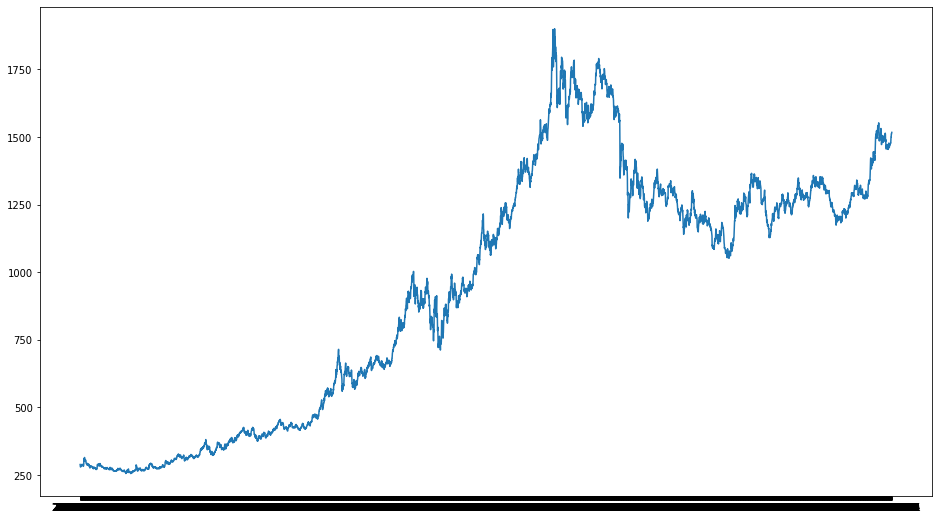

In [1]:
%matplotlib inline
# import packages
import pandas as pd
import numpy as np

# to plot within notebook
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 16,9

# read data, set index as dates, then plot price
df = pd.read_csv('../res/input0130.csv')
df.index = df['date']
plt.figure()
plt.plot(df['close'], label='Price History')

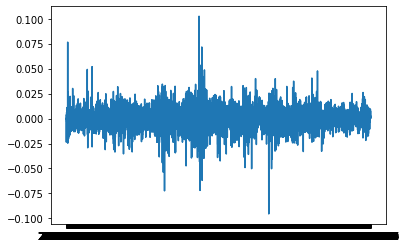

In [10]:
# plot returns
plt.plot(df['log_r'], label='Price History')

acf figure:


D:\Anaconda3\envs\inno\lib\site-packages\ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


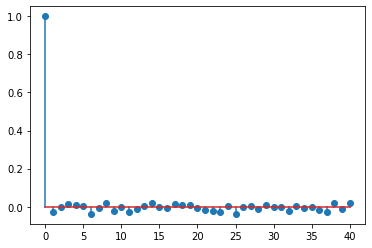

In [6]:
# test some important properties
import statsmodels.tsa.stattools as ts

# acf and pacf
# acf figure:
plt.stem(ts.acf(df.log_r));

pacf figure:


D:\Anaconda3\envs\inno\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


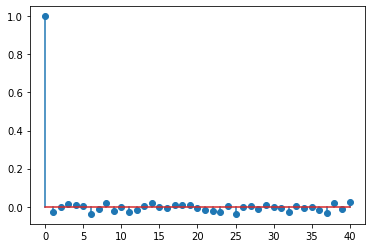

In [7]:
# pacf figure:
plt.stem(ts.pacf(df.log_r));

In [9]:
# adf test
print('adf test result:')
print(ts.adfuller(df.log_r))
print('kpss test result:')
print(ts.kpss(df.log_r))
# results are pretty good, so primarily we say it's wide-stationary

adf test result:
(-74.06646245751487, 0.0, 0, 5209, {'1%': -3.4316060041134553, '5%': -2.862095022902595, '10%': -2.5670654385215923}, -32332.281348947872)
kpss test result:
(0.22748554904779136, 0.1, 33, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


D:\Anaconda3\envs\inno\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [67]:
#importing required libraries
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.callbacks import EarlyStopping
# follow the literature
# we don't use min-max scaling here, use partial mean-std scaling instead
from sklearn.preprocessing import StandardScaler
from itertools import chain

# and we define our model here
def lstm_model():
    model = Sequential()
    model.add(LSTM(units=25,dropout=0.1, input_shape=(240,1)))
    model.add(Dense(1,activation='softmax'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [71]:
# we use rolling window, 750 bars for train and 250 for test
scaler = StandardScaler()
starter = range(240,len(df)-1000,250)
all_results = []
all_evas = []
y_pred_clf = []
for train_begin in starter:
    train_end = train_begin + 750
    test_end = train_end + 250
    train_set = df[{'log_r','label'}][train_begin:train_end].reset_index()
    x_train, y_train = [], []
    x_train_set = list(chain.from_iterable(scaler.fit_transform(train_set['log_r'].values.reshape(-1,1))))
    for i in range(240,len(x_train_set)):
        x_train.append(x_train_set[i-240:i])
        y_train.append(train_set['label'][i])
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1)) 
    
    model = lstm_model()
    model.fit(x_train,y_train,epochs=100,callbacks=[EarlyStopping(monitor='loss',patience=10)])

    x_test, y_test = [], []
    test_set = df[{'log_r','label'}][train_end-240:test_end].reset_index()
    x_test_set = list(chain.from_iterable(scaler.transform(test_set['log_r'].values.reshape(-1,1))))
    for i in range(240,len(x_test_set)):
        x_test.append(x_test_set[i-240:i])
        y_test.append(test_set['label'][i])
    x_test, y_test = np.array(x_test), np.array(y_test)
    x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1)) 
    
    all_results.append(model.predict(x_test))
    all_evas.append(model.evaluate(x_test, y_test))
    y_pred_clf.append(model.predict_classes(x_test))
    

Epoch 1/100
510/510 [==============================] - 3s 7ms/step - loss: 0.4863
Epoch 2/100
510/510 [==============================] - 3s 6ms/step - loss: 0.4863
Epoch 3/100
510/510 [==============================] - 3s 6ms/step - loss: 0.4863
Epoch 4/100
510/510 [==============================] - 3s 6ms/step - loss: 0.4863
Epoch 5/100
510/510 [==============================] - 3s 6ms/step - loss: 0.4863
Epoch 6/100
510/510 [==============================] - 3s 6ms/step - loss: 0.4863
Epoch 7/100
510/510 [==============================] - 3s 6ms/step - loss: 0.4863
Epoch 8/100
510/510 [==============================] - 3s 6ms/step - loss: 0.4863
Epoch 9/100
510/510 [==============================] - 3s 6ms/step - loss: 0.4863
Epoch 10/100
510/510 [==============================] - 3s 6ms/step - loss: 0.4863
Epoch 11/100
510/510 [==============================] - 3s 6ms/step - loss: 0.4863
Epoch 12/100
510/510 [==============================] - 3s 6ms/step - loss: 0.4863
Epoch 13/100


In [60]:
x_test, y_test = [], []
test_set = df[{'log_r','label'}][train_end-240:test_end].reset_index()
x_test_set = list(chain.from_iterable(scaler.transform(test_set['log_r'].values.reshape(-1,1))))
for i in range(240,len(x_test_set)):
    x_test.append(x_test_set[i-240:i])
    y_test.append(test_set['label'][i])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1)) 

y_pred = model.predict(x_test)
y_eva = model.evaluate(x_test, y_test)
y_pred_clf = model.predict_classes(x_test)

250/250 [==============================] - 1s 4ms/step


In [72]:
all_results


[array([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
      

In [73]:
all_evas



[0.45200000047683714,
 0.45200000071525576,
 0.43200000023841856,
 0.45199999952316283,
 0.448,
 0.5080000004768371,
 0.41600000047683716,
 0.424,
 0.45599999952316284,
 0.5079999995231629,
 0.48,
 0.548,
 0.5200000023841858,
 0.48000000047683716,
 0.45600000286102294,
 0.5160000007152558]